In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score # For Checking Accuracy
from sklearn.model_selection import train_test_split # Splitting Data For Train Test
from sklearn.neighbors import KNeighborsClassifier # ML Algo KNN
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB # For Multinomial Naive Bayes Model
from sklearn.model_selection import cross_val_score # For Cross Validation
from sklearn.naive_bayes import BernoulliNB 
import warnings
warnings.filterwarnings('ignore')

In [5]:
train = pd.read_csv("C:/Users/glab/Desktop/train.csv")
test = pd.read_csv('C:/Users/glab/Desktop/test.csv')
train.head()
test.head()
print(train.shape)
print(test.shape)

(900000, 33)
(700000, 32)


In [6]:
del train['id']
del train['f_27']

# del test['id']
del test['f_27']

In [7]:
X = train.drop(columns=['target'])
y = train['target']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(630000, 30)
(270000, 30)
(630000,)
(270000,)


In [10]:
bnbTesting = BernoulliNB() #Classifier
bnbTesting.fit(X_train, y_train) #Training by fitting into model
bnbTestingPred = bnbTesting.predict(X_test) #Prediction
bnbAcc = metrics.accuracy_score(y_test, bnbTestingPred) #Checking Accuracy Score
print ("Naive Bayes Accuracy: ", bnbAcc)

Naive Bayes Accuracy:  0.5810888888888889


In [12]:
nav_clf = BernoulliNB()
nav_scores = cross_val_score(nav_clf, X_train, y_train, cv=6)
print('Naive Bayes Scores: ',nav_scores)
nav_mean = nav_scores.mean()
print('Naive Bayes Mean Score: ',nav_mean)

Naive Bayes Scores:  [0.58599442 0.58252381 0.58390476 0.58149524 0.58317143 0.58197697]
Naive Bayes Mean Score:  0.5831777714008763


In [13]:

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred  =  classifier.predict(X_test)

gnbAcc = metrics.accuracy_score(y_test, y_pred) # Checking Accuracy Score
print ("Naive Bayes Accuracy: ", gnbAcc)

Naive Bayes Accuracy:  0.6253814814814814


In [14]:
nav_clf = GaussianNB()
nav_scores = cross_val_score(nav_clf, X_train, y_train, cv=6)
print('Naive Bayes Scores: ',nav_scores)
nav_mean = nav_scores.mean()
print('Naive Bayes Mean Score: ',nav_mean)

Naive Bayes Scores:  [0.62624165 0.62591429 0.62629524 0.62491429 0.62641905 0.62606311]
Naive Bayes Mean Score:  0.6259746028911913


In [15]:
print(train.shape)
print(test.shape)

(900000, 31)
(700000, 31)


In [16]:
ZainCSVtoTest = test[['id']]
ZainCSVtoTest

,id
0,900000
1,900001
2,900002
3,900003
4,900004
...,...
699995,1599995
699996,1599996
699997,1599997
699998,1599998


In [17]:

predT = test.drop(columns=['id'])
predT.head(2)

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_28,f_29,f_30
0,0.442517,0.174380,-0.999816,0.762741,0.186778,-1.074775,0.501888,6,6,0,...,2.749347,-1.006400,-1.193879,-2.435736,-2.427430,-1.966887,5.734205,99.478419,0,0
1,-0.605598,-0.305715,0.627667,-0.578898,-1.750931,1.355550,-0.190911,1,3,4,...,1.080762,2.382405,0.149442,1.883322,-2.848714,-0.725155,3.194219,-65.993825,1,0


In [18]:
predictionOnTest = classifier.predict(predT)
print(predictionOnTest)
print(len(predictionOnTest))

[0 1 1 ... 0 0 0]
700000


In [19]:
ZainCSVtoTest['target'] = predictionOnTest
ZainCSVtoTest.head()

,id,target
0,900000,0
1,900001,1
2,900002,1
3,900003,0
4,900004,0


In [20]:
ZainCSVtoTest.shape
ZainCSVtoTest.to_csv('ZainCSVtoTest.csv', index=False)

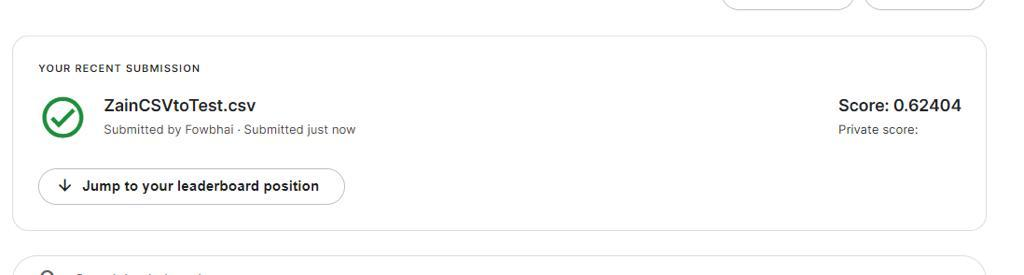